In [1]:
import numpy as np
import cv2
# from google.colab.patches import cv2_imshow
from scipy.spatial import distance
import matplotlib.pyplot as plt
ep=10
import math
import itertools

In [2]:
def rrt_holon(img, t1, t2):
    ep=10
    for i in range(100):
        available = np.array(np.where((img == [255, 255, 255]).all(axis = 2))).T
        qRand = available[np.random.randint(0,len(available))]
#         qRand = [100,20]
#         t1t = t1.copy()
#         t1t -= qRand
#         t1t = t1t ** 2
#         tsum = []
#         for x,y in t1t:
#             tsum.append(x + y)
#         tsum = np.asarray(tsum)


        calc = distance.cdist(t1,[qRand])
        qNear = t1[np.argmin(calc)]
        u = qRand - qNear
        if np.linalg.norm(u) == 0: continue
        v = u / np.linalg.norm(u)
        qNew = qNear + ep*v
        qNew = np.asarray(qNew,dtype=np.int64)
        imgcpy = img.copy()
        prevobs = np.sum(np.all(imgcpy == (0,0,0), axis=2))
        cv2.line(imgcpy,(int(qNear[0]),int(qNear[1])),(int(qNew[0]),int(qNew[1])),(0,0,255))
#         newline = np.array(np.where((imgcpy == [0, 0, 255]).all(axis = 2))).T
#         flg = 1
        newobs = np.sum(np.all(imgcpy == (0,0,0), axis=2))
        if prevobs == newobs:
            cv2.line(img,(int(qNear[0]),int(qNear[1])),(int(qNew[0]),int(qNew[1])),(0,0,255))
            t1 = np.vstack([t1,qNew])
#             available = np.array(np.where((img == [255, 255, 255]).all(axis = 2))).T
        plt.imshow(img.astype(np.uint8))
        if np.min(distance.cdist(t1,t2)) < 10 : 
            break
        

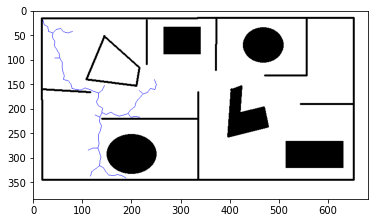

In [3]:
t1 = [[20,20]]
t2 = [[600,150]]
t1 = np.asarray(t1)
t2 = np.asarray(t2)
img = 255*np.ones((200,200,3))
img1 = cv2.imread("untitled.png")
cv2.line(img,(25,15),(25,175),(0,0,0),2)
plt.imshow(img1)
# available = np.array(np.where((img == [255, 255, 255]).all(axis = 2))).T
rrt_holon(img1,t1,t2)

In [7]:
def rrt_nonholon(img, t1, t2):
    theta0=0
    del_t=1
    for i in range(500):
        available = np.array(np.where((img == [255, 255, 255]).all(axis = 2))).T
        qRand = available[np.random.randint(0,len(available))]
        calc = distance.cdist(t1,[qRand])
        qNear = t1[np.argmin(calc)]

        v, w = [-5, 5], [-math.pi/15, 0, math.pi/15]
        controls = list(itertools.product(v, w))
        
        max_dist = np.inf
        x0=qNear[0]
        y0=qNear[1]
        xfinal = 0
        yfinal = 0
        thetafinal = 0
        xgoal=qRand[0]
        ygoal=qRand[1]
        qNew=[0,0]

        for i in controls:
            vtemp, wtemp = i[0], i[1]
            xnew = x0 + vtemp*del_t*math.cos(theta0 + wtemp*del_t)
            ynew = y0 + vtemp*del_t*math.sin(theta0 + wtemp*del_t)
             
            dist_from_goal = np.linalg.norm(np.array([xgoal,ygoal])-np.array([xnew,ynew]))
            
            if dist_from_goal < max_dist:
#                 print(dist_from_goal)
                qNew[0] = xnew
                qNew[1] = ynew
                thetafinal = (theta0 + wtemp*del_t)
                max_dist = dist_from_goal

        theta0=thetafinal

        #u = qRand - qNear
        #if np.linalg.norm(u) == 0: continue
        #v = u / np.linalg.norm(u)
        #qNew = qNear + ep*v
        qNew = np.asarray(qNew,dtype=np.int64)

        imgcpy = img.copy()
        prevobs = np.sum(np.all(imgcpy == (0,0,0), axis=2))
        cv2.line(imgcpy,(int(qNear[0]),int(qNear[1])),(int(qNew[0]),int(qNew[1])),(0,0,255))

        newobs = np.sum(np.all(imgcpy == (0,0,0), axis=2))
        if prevobs == newobs:
            cv2.line(img,(int(qNear[0]),int(qNear[1])),(int(qNew[0]),int(qNew[1])),(0,0,255))
            t1 = np.vstack([t1,qNew])

        plt.imshow(img.astype(np.uint8))
        if np.min(distance.cdist(t1,t2)) < 10 : 
            break

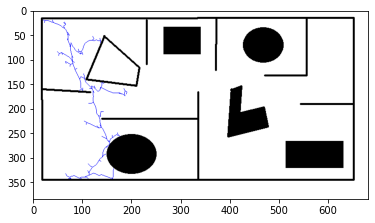

In [8]:
t1 = [[20,20]]
t2 = [[600,150]]
t1 = np.asarray(t1)
t2 = np.asarray(t2)
img = 255*np.ones((200,200,3))
img1 = cv2.imread("untitled.png")
cv2.line(img,(25,15),(25,175),(0,0,0),2)
# plt.imshow(img1)
# available = np.array(np.where((img == [255, 255, 255]).all(axis = 2))).T
rrt_nonholon(img1,t1,t2)